# Project 4 - EDA

## Introduction
Garrett Beaver
9/17/2024

This module will showcase all the steps necessary to perform an exploratory data analysis on a data set.  It will be done in a Jupyter notebook using a standard dataset; the iris data set that is built into the Seaborn package.

This notebook is structured as follows:

1. Data Acquisition
2. Initial Data Inspection
3. Initial Descriptive Statistics
4. Initial Visualizations
5. Feature Engineering / Additional Visualizations
6. Conclusions and Insights


## Import modules

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
#contains data set to be analyzed
import seaborn as sns
import json
import requests

## 1. Data Acquisition  

In [5]:
# Load the Iris dataset into DataFrame
df = sns.load_dataset('iris')

## 2. Intial Data Inspection


In [6]:

#first, look at the features of the data frame
print(df.head(10))




   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
5           5.4          3.9           1.7          0.4  setosa
6           4.6          3.4           1.4          0.3  setosa
7           5.0          3.4           1.5          0.2  setosa
8           4.4          2.9           1.4          0.2  setosa
9           4.9          3.1           1.5          0.1  setosa


In the iris data set, we can see we have sepal length/width, petal length/width, and species classification.

It is important to understand what data the data set actually is before trying to analyze it, so here is an image from "plantid.net" showing what a flower sepal actually is:

![flower diagram](https://plantid.net/Classic/Glossary/Sepal_files/image001.png)

In [7]:
#see how many rows and columns
print(df.shape)
#what kind of data is it
print(df.dtypes)



(150, 5)
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


In [8]:
#check for missing values
print(df.isnull().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


This data set is compromised of 4 float values and a species column which contains strings.  The data set does not require any cleaning, as there are no missing values.

## 3. Descriptive Statistics

### Numeric descriptors

In [9]:
#general description of the numeric values of this data set
print(df.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


From the general description, it looks like petal length might be the most interesting thing to look at, because it has the highest std deviation.  There is generally more variation in petal dimensions than sepal dimensions.

In [10]:
# Calculate the means of the different species
mean_by_species = df.groupby('species').mean()

# Display the result
print(mean_by_species)

            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa             5.006        3.428         1.462        0.246
versicolor         5.936        2.770         4.260        1.326
virginica          6.588        2.974         5.552        2.026


### Categorical descriptors 

In [11]:
#see how many different species are in this data set
df.value_counts("species")

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

There are an equal number of data points for each species

## 4. Initial Visualizations

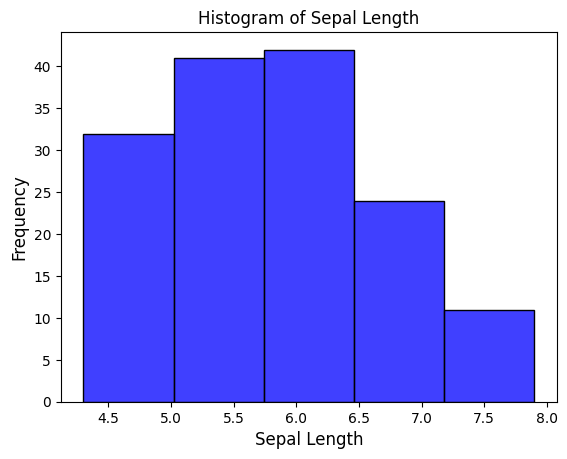

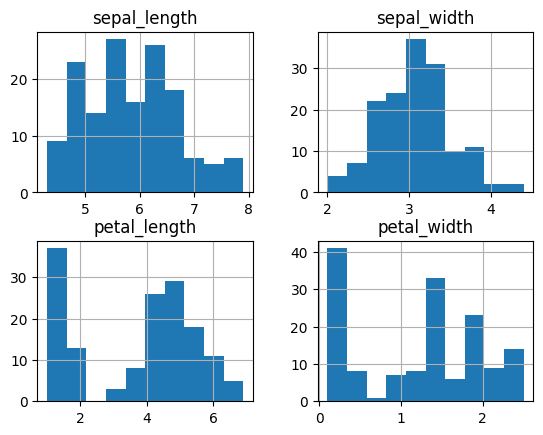

In [12]:
#plot a histogram of sepal length with customizations 
sns.histplot(df['sepal_length'], bins=5, color='blue')

# Add labels and title
plt.title('Histogram of Sepal Length', fontsize=12)
plt.xlabel('Sepal Length', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

#Show plot
plt.show()

# Plot histograms for all numerical columns
df.hist()

#show plot
plt.show()

Sepal length and width are tightly grouped, where as there looks like two distinct groups in the petal dimensions.

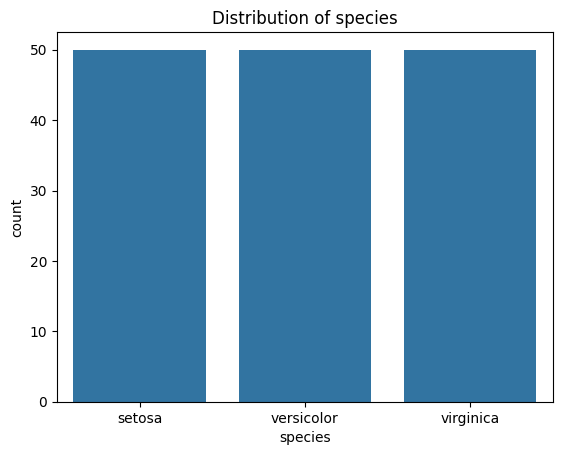

In [13]:
# Inspect value counts for all categorical columns
for col in df.select_dtypes(include=['object', 'category']).columns:
    # Display count plot
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

# Show all plots
plt.show()

This plot confirms the .value_count() results that there are an equal number of 50 data points for each species

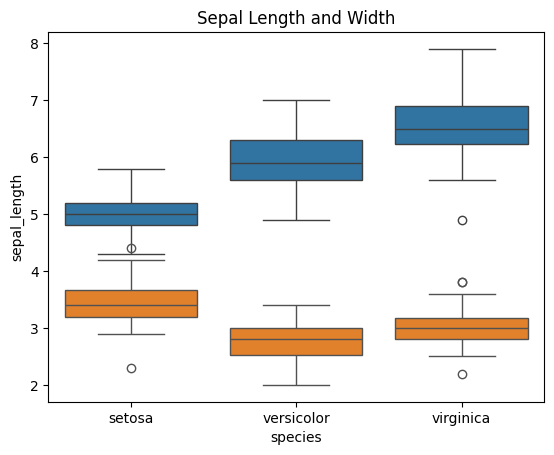

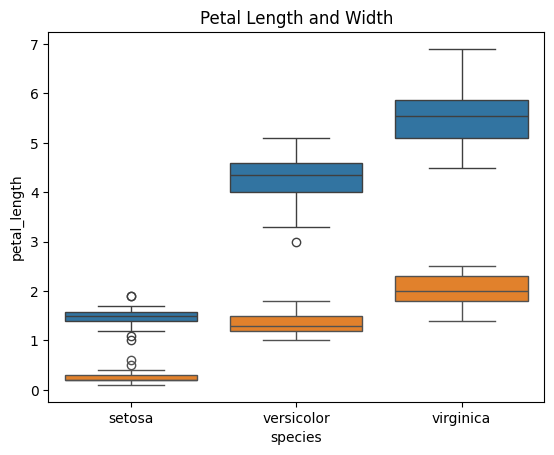

In [14]:

sns.boxplot(x="species", y="sepal_length", data=df)
sns.boxplot(x="species", y="sepal_width", data=df)
plt.title('Sepal Length and Width')
plt.show()


sns.boxplot(x="species", y="petal_length", data=df)
sns.boxplot(x="species", y="petal_width", data=df)
plt.title('Petal Length and Width')
plt.show()

Sepal length and width are not correlated, but petal length and width are.  We can draw the same conclusion about std deviation as when view the data from .describe() earlier.

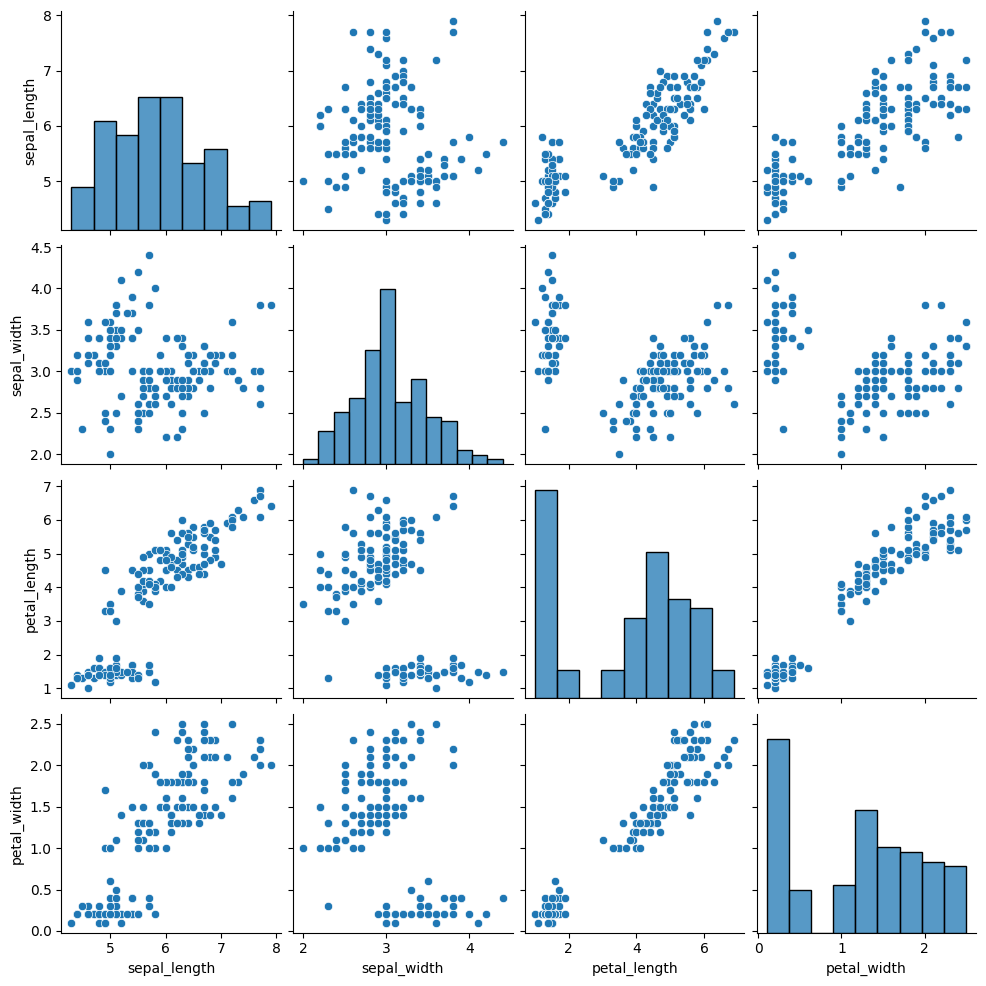

In [15]:
#pairplot of data hue="species",
sns.pairplot(df,  markers=["o", "s", "D"])
plt.show()

Pairplot shows a lot of information. The Setosa variety is clearly much smaller than the other two species, since it appears to be grouped by itself in quite a few of these plots.  The other two varieties of species are more similar, but are clearly visually separate, since the orange and green data points are grouped.

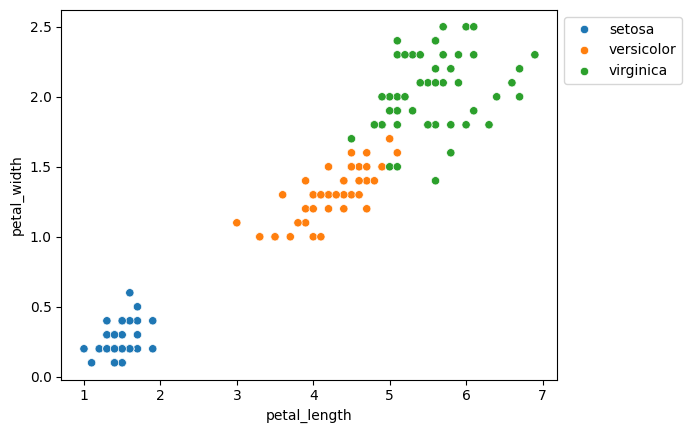

In [16]:
sns.scatterplot(x='petal_length', y='petal_width', 
                hue='species', data=df, ) 
  
# Placing Legend outside the Figure 
plt.legend(bbox_to_anchor=(1, 1), loc=2) 
  
plt.show()

Once again the Setosa species overall has smaller petals, and there is less variation in measurements.

In [17]:
#drop the species
correlation = df.drop(columns='species').corr()

print(correlation_matrix)

NameError: name 'correlation_matrix' is not defined

Confirming what can be seen in the graph, there is a correlation between petal width and length.  Also petal area and petal width are correlated.

## 5. Feature Engineering / Additional Visualizations

In [240]:
#reorder columns
columns=['species', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df= df[columns]

# Renaming columns to improve readbility  
df.rename(columns={'sepal_length': 'Sepal Length'}, inplace=True)
df.rename(columns={'sepal_width': 'Sepal Width'}, inplace=True)
df.rename(columns={'petal_length': 'Petal Length'}, inplace=True)
df.rename(columns={'petal_width': 'Petal Width'}, inplace=True)

# Calculate area of sepal and petal
df['Sepal Area'] = df['Sepal Length'] * df['Sepal Width']
df['Petal Area'] = df['Petal Length'] * df['Petal Width']

#confirm these changes
df.head()

,species,Sepal Length,Sepal Width,Petal Length,Petal Width,Sepal Area,Petal Area
0,setosa,5.1,3.5,1.4,0.2,17.85,0.28
1,setosa,4.9,3.0,1.4,0.2,14.70,0.28
2,setosa,4.7,3.2,1.3,0.2,15.04,0.26
3,setosa,4.6,3.1,1.5,0.2,14.26,0.30
4,setosa,5.0,3.6,1.4,0.2,18.00,0.28


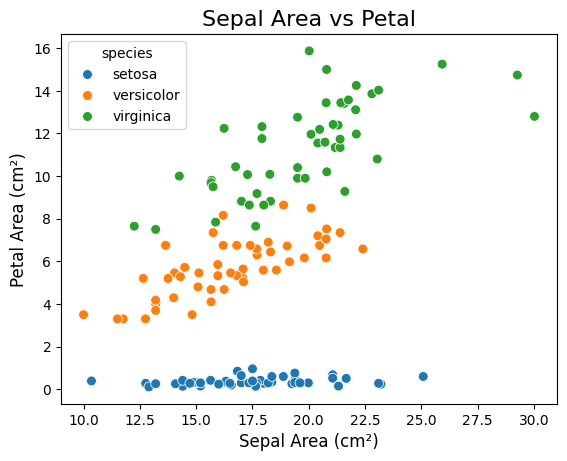

In [241]:
#plot sepal area vs petal area


# Create a scatter plot of sepal area vs petal area
sns.scatterplot(x='Sepal Area', y='Petal Area', hue='species', data=df, s=50)

# Add labels and title
plt.title('Sepal Area vs Petal', fontsize=16)
plt.xlabel('Sepal Area (cm²)', fontsize=12)
plt.ylabel('Petal Area (cm²)', fontsize=12)

# Show the plot
plt.show()

It appears the petal area generally will scale with sepal area for the Versicolor and Virginica species, but for Setosa the petals remain the same size regardless of sepal area.

In [242]:
# Calculate the means of the different species
mean_by_species_with_area = df.groupby('species').mean()

# Display the result
print(mean_by_species_with_area)

            Sepal Length  Sepal Width  Petal Length  Petal Width  Sepal Area  \
species                                                                        
setosa             5.006        3.428         1.462        0.246     17.2578   
versicolor         5.936        2.770         4.260        1.326     16.5262   
virginica          6.588        2.974         5.552        2.026     19.6846   

            Petal Area  
species                 
setosa          0.3656  
versicolor      5.7204  
virginica      11.2962  


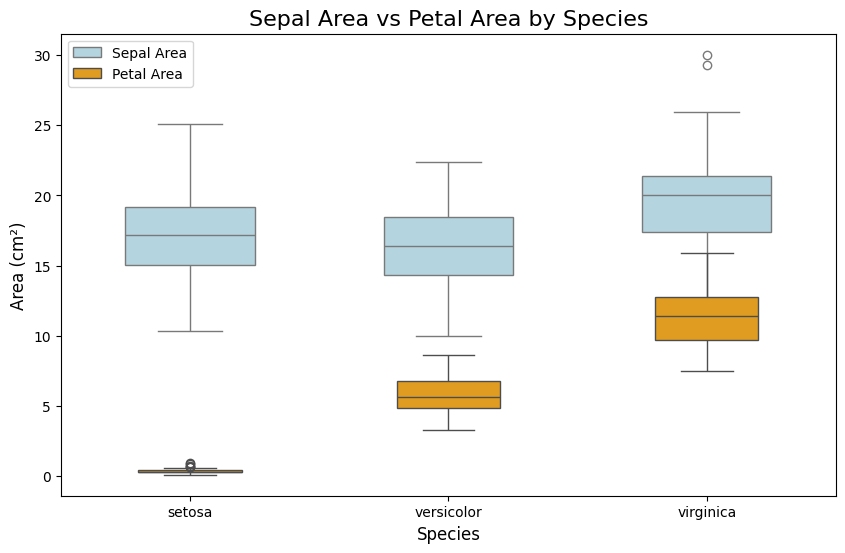

In [243]:
# Create a figure and axes
plt.figure(figsize=(10, 6))

# Plot sepal area and petal area for each species
sns.boxplot(x='species', y='Sepal Area', data=df, color='lightblue', width=0.5, label='Sepal Area')
sns.boxplot(x='species', y='Petal Area', data=df, color='orange', width=0.4, label='Petal Area')

# Add labels and title
plt.title('Sepal Area vs Petal Area by Species', fontsize=16)
plt.xlabel('Species', fontsize=12)
plt.ylabel('Area (cm²)', fontsize=12)

# Add legend
plt.legend()

# Show the plot
plt.show()

This box plot clearly show the how tightly grouped the petal Setosa petal area is in comparison of the other species.  The sepal area is similar in size and variability to the other species.

## 6. Conclusions / Insights

- Setosa is distinct for Versicolor and Viginica in two way
  - Smaller petals
  - Less variability if petal size
- Versicolor and Viginica are similar, but Viginica will typically have larger petals
- Sepal area is virtually the same across species
- Sepal size is correlated with petal size.